In [2]:
#Import the modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np


In [3]:

testDf= tf.keras.utils.image_dataset_from_directory(
   "DataSets/deeplproj-grapes/test",
    labels='inferred',
    shuffle= True,
    batch_size= 32,
    image_size= (256,256)
)


Found 405 files belonging to 4 classes.


2023-12-29 07:35:24.470778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2332 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [4]:
class_names=testDf.class_names
class_names

['black rot',
 'esca (black measles)',
 'healthy',
 'leaf blight (isariopsis leaf spot)']

In [5]:
IMAGE_SIZE=256
CHANELS = 3

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip= True,
    rotation_range= 10,
    
)

train_generator = train_data_generator.flow_from_directory(
    'DataSets/deeplproj-grapes/train/',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 2927 images belonging to 4 classes.


In [6]:
for image_batch, label_batch in train_generator:
    print(image_batch.shape)
    break

(32, 256, 256, 3)


In [7]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip= True,
    rotation_range= 10,
    
)

validation_generator = train_data_generator.flow_from_directory(
    'DataSets/deeplproj-grapes/validation/',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 730 images belonging to 4 classes.


In [8]:
test_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip= True,
    rotation_range= 10,
    
)

test_generator = train_data_generator.flow_from_directory(
    'DataSets/deeplproj-grapes/test/',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 405 images belonging to 4 classes.


In [9]:
#Now we start wiht CNN use
from tensorflow.keras.layers import Input
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANELS)
n_classes = 4

model= models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

#model.build(input_shape=IMAGE_SIZE)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
model.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
#steps per epoch training data / batch size
2927/32


91.46875

In [13]:
#validation steps = validation data / batch size
730/32


22.8125

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=91,
    batch_size=32,
    validation_data= validation_generator,
    validation_steps=22,
    verbose=1,
    epochs=36,
    use_multiprocessing= True,
    workers=4,
)

Epoch 1/36


2023-12-29 07:35:48.542712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-29 07:35:50.826127: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-12-29 07:35:52.307308: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f3798defc60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-29 07:35:52.307339: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2023-12-29 07:35:52.311177: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-29 07:35:52.

91/91 [==============================] - ETA: 0s - loss: 0.9174 - accuracy: 0.5786

2023-12-29 07:36:06.193922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


91/91 [==============================] - 27s 221ms/step - loss: 0.9174 - accuracy: 0.5786 - val_loss: 0.7200 - val_accuracy: 0.7102
Epoch 2/36
91/91 [==============================] - 16s 166ms/step - loss: 0.4464 - accuracy: 0.8276 - val_loss: 0.3753 - val_accuracy: 0.8580
Epoch 3/36
91/91 [==============================] - 15s 160ms/step - loss: 0.2557 - accuracy: 0.8984 - val_loss: 0.1566 - val_accuracy: 0.9347
Epoch 4/36
91/91 [==============================] - 16s 163ms/step - loss: 0.1649 - accuracy: 0.9392 - val_loss: 0.1062 - val_accuracy: 0.9645
Epoch 5/36
91/91 [==============================] - 21s 223ms/step - loss: 0.1274 - accuracy: 0.9523 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 6/36
91/91 [==============================] - 15s 153ms/step - loss: 0.1144 - accuracy: 0.9579 - val_loss: 0.0603 - val_accuracy: 0.9744
Epoch 7/36
91/91 [==============================] - 16s 167ms/step - loss: 0.1102 - accuracy: 0.9589 - val_loss: 0.0400 - val_accuracy: 0.9858
Epoch 8/36

In [16]:
scores = model.evaluate(test_generator)

2023-12-29 07:48:02.591757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 3s 257ms/step - loss: 0.0116 - accuracy: 0.9951


In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss= history.history['val_loss']


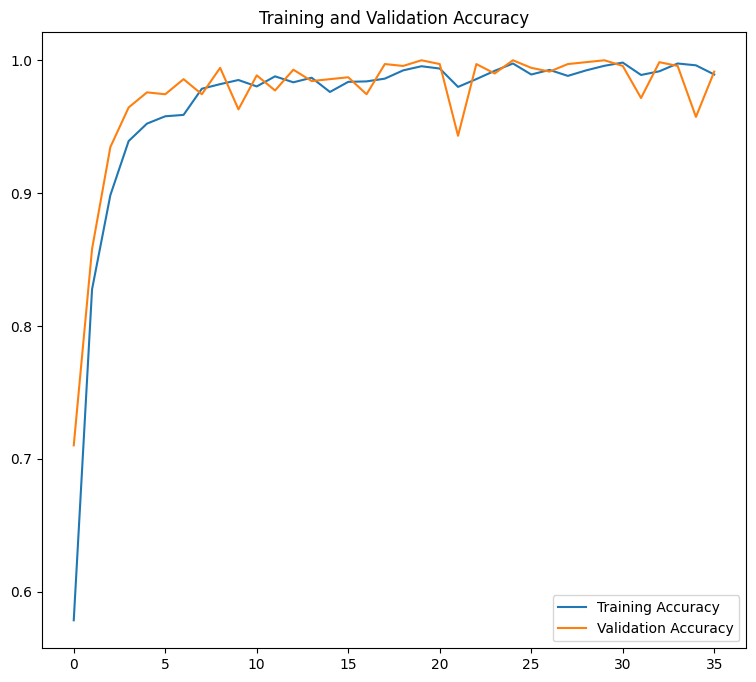

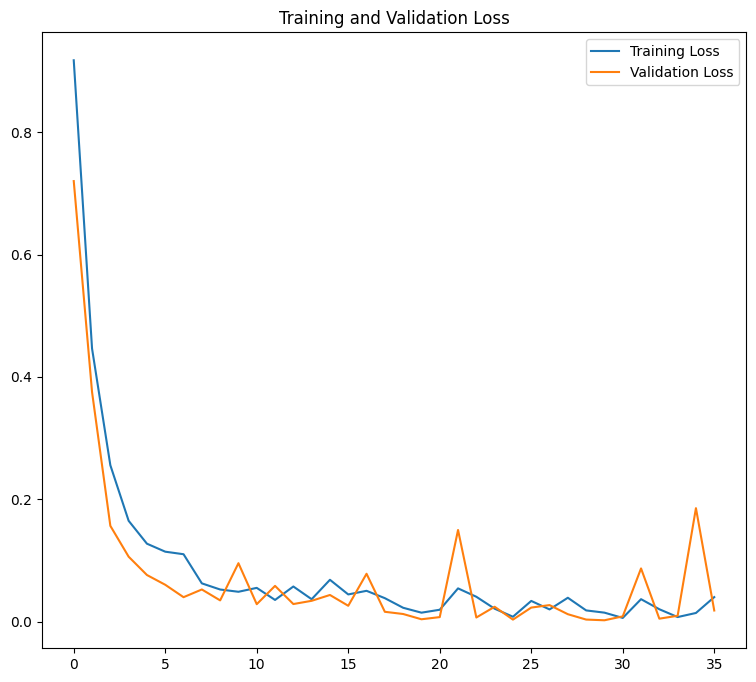

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(36), acc, label='Training Accuracy')
plt.plot(range(36), val_acc , label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(36), loss, label='Training Loss')
plt.plot(range(36), val_loss , label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image to predict
Actual label:  leaf blight (isariopsis leaf spot)
1/1 [==============================] - 0s 181ms/step
Predicted Label:  leaf blight (isariopsis leaf spot)


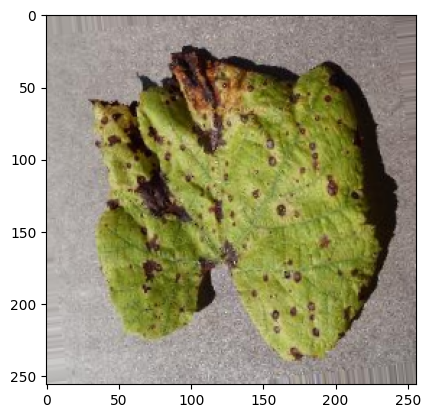

In [19]:
for image_batch, label_batch in test_generator:

    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])

    break

In [20]:
#now we write a function that takes model and image as an input and tells us what is the predicted class 

def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #creates a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


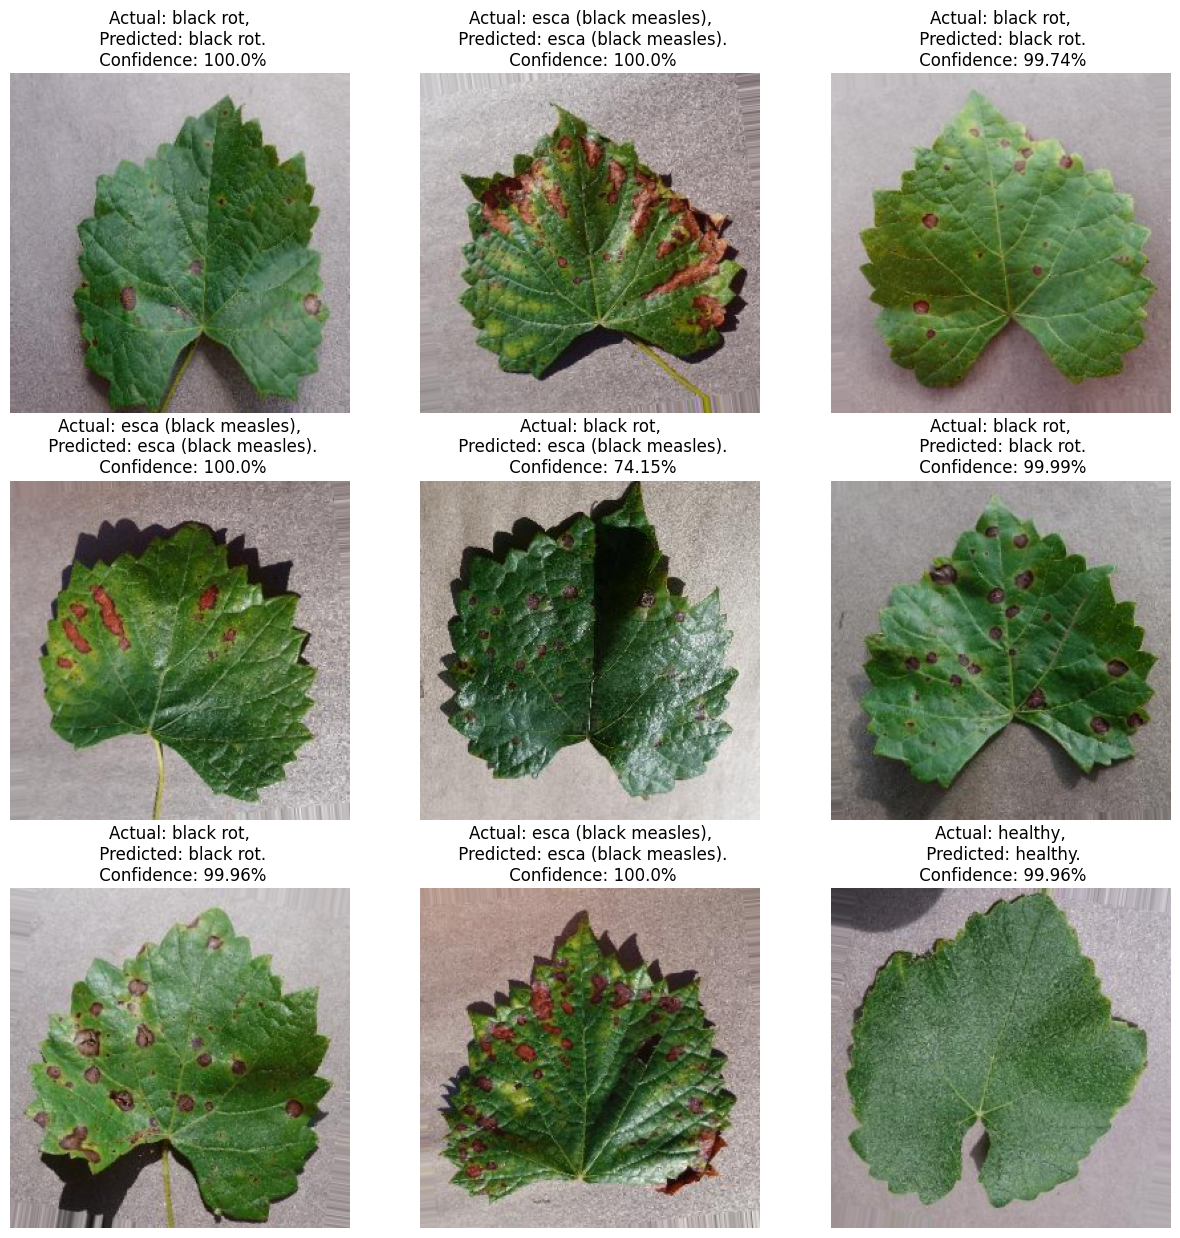

In [22]:
plt.figure(figsize=(15,15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i+1) 
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

    break

In [23]:
model.save("modelsdeepl/grapes.h5")